In [271]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier


In [273]:
# Load the dataset
data_path = 'https://raw.githubusercontent.com/houleye45/machine_learning_projectweek7/main/data/raw/data.csv'  # Replace with the actual path to your dataset
data = pd.read_csv(data_path, delimiter=';')

# Show the first five rows of the dataset to get an overview
print(data.head())

# Get information about the dataset (column names, data types, etc.)
print(data.info())

# Statistical summary of the numerical columns
print(data.describe())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [275]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display the columns with missing values, if any
print("Missing values in each column:\n", missing_values)


Missing values in each column:
 Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder              

In [277]:
# Load the dataset with the correct delimiter (semicolon)
data = pd.read_csv(data_path, delimiter=';')

# Show the first few rows to verify the structure is now correct
display(data.head())

# Get information about the dataset
display(data.info())

# Statistical summary of the numerical columns
display(data.describe())


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

None

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [279]:
# Identifying which columns in the dataset are categorical (contain non-numeric data)
categorical_columns = data.select_dtypes(include=['object']).columns

# Display the names of the categorical columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: Index(['Target'], dtype='object')


In [281]:
# Convert the 'Target' column into numeric values (1 for 'Graduate', 0 for 'Dropout')
data['Target_encoded'] = data['Target'].apply(lambda x: 1 if x == 'Graduate' else 0)

# Display the first few rows to confirm the transformation
print(data[['Target', 'Target_encoded']].head())


     Target  Target_encoded
0   Dropout               0
1  Graduate               1
2   Dropout               0
3  Graduate               1
4  Graduate               1


In [283]:
# Check the data types of each column to see if there are any non-numeric columns left
print(data.dtypes)

# Select only numeric columns for further analysis
numeric_data = data.select_dtypes(include=['float64', 'int64', 'uint8'])

# Display the first few rows of the numeric data
display("Numeric Data:\n", numeric_data.head())


Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

'Numeric Data:\n'

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target_encoded
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [285]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'numeric_data' is your dataset after cleaning and encoding
X = numeric_data.drop('Target_encoded', axis=1)  # Features
y = numeric_data['Target_encoded']  # Target variable

# Split the data into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now select the numeric columns for standardization
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Apply the StandardScaler only to the numeric columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

# Check the data types to ensure all features are numeric
print(X_train.dtypes)


Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [287]:
from sklearn.preprocessing import StandardScaler

# Select only the numeric columns for standardization
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Apply the StandardScaler only to the numeric columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])

# Check the data types to ensure all features are numeric
print(X_train.dtypes)


Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [289]:
# Select only the numeric columns for standardization
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

# Apply the StandardScaler only to the numeric columns
X_train_scaled = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled = scaler.transform(X_test[numeric_columns])
# Check the data types to ensure all features are numeric
print(X_train.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [291]:
# Select only the numeric columns for the correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_data.corr()

# Get the correlation values of all features with the 'Target_encoded' variable
important_features = correlation_matrix['Target_encoded'].sort_values(ascending=False)

# Display the correlation values, sorted from highest to lowest
print("Features sorted by correlation with 'Target_encoded':")
print(important_features)


Features sorted by correlation with 'Target_encoded':
Target_encoded                                    1.000000
Curricular units 2nd sem (approved)               0.576840
Curricular units 1st sem (approved)               0.492443
Curricular units 2nd sem (grade)                  0.472864
Curricular units 1st sem (grade)                  0.412982
Tuition fees up to date                           0.327197
Scholarship holder                                0.299484
Curricular units 2nd sem (enrolled)               0.180197
Curricular units 1st sem (enrolled)               0.160661
Admission grade                                   0.125263
Previous qualification (grade)                    0.111278
Displaced                                         0.102329
Application order                                 0.093670
Curricular units 2nd sem (credited)               0.065073
Daytime/evening attendance\t                      0.058235
Curricular units 1st sem (credited)               0.058157
GD

In [293]:
# Set a correlation threshold, below which features are considered irrelevant
correlation_threshold = 0.1

# Filter out features with correlation less than the threshold
relevant_features = important_features[important_features.abs() > correlation_threshold]

# Display the relevant features
print("Relevant Features based on correlation threshold:\n", relevant_features)

# Get the list of relevant feature names (excluding the Target_encoded itself)
relevant_feature_names = relevant_features.index.drop('Target_encoded').tolist()

# Use only the relevant features for training the model
X_train_selected = X_train[relevant_feature_names]
X_test_selected = X_test[relevant_feature_names]

# Train the KNN model again with the filtered features
knn.fit(X_train_selected, y_train)

# Print confirmation that the model has been retrained
print("KNN model retrained with relevant features based on correlation threshold!")


Relevant Features based on correlation threshold:
 Target_encoded                         1.000000
Curricular units 2nd sem (approved)    0.576840
Curricular units 1st sem (approved)    0.492443
Curricular units 2nd sem (grade)       0.472864
Curricular units 1st sem (grade)       0.412982
Tuition fees up to date                0.327197
Scholarship holder                     0.299484
Curricular units 2nd sem (enrolled)    0.180197
Curricular units 1st sem (enrolled)    0.160661
Admission grade                        0.125263
Previous qualification (grade)         0.111278
Displaced                              0.102329
Age at enrollment                     -0.195009
Application mode                      -0.208550
Debtor                                -0.213845
Gender                                -0.216754
Name: Target_encoded, dtype: float64
KNN model retrained with relevant features based on correlation threshold!


In [295]:
# Feature Engineering: Create new features

# Create a new feature: Average grade across both semesters
data['Average grade'] = (data['Curricular units 1st sem (grade)'] + data['Curricular units 2nd sem (grade)']) / 2

# Create new features: Pass rate for the first and second semesters
data['Pass rate 1st sem'] = data['Curricular units 1st sem (approved)'] / data['Curricular units 1st sem (enrolled)']
data['Pass rate 2nd sem'] = data['Curricular units 2nd sem (approved)'] / data['Curricular units 2nd sem (enrolled)']

# Display the first few rows to confirm new features are added
print(data[['Average grade', 'Pass rate 1st sem', 'Pass rate 2nd sem']].head())


   Average grade  Pass rate 1st sem  Pass rate 2nd sem
0       0.000000                NaN                NaN
1      13.833333           1.000000           1.000000
2       0.000000           0.000000           0.000000
3      12.914286           1.000000           0.833333
4      12.666667           0.833333           1.000000


In [297]:
print(data.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

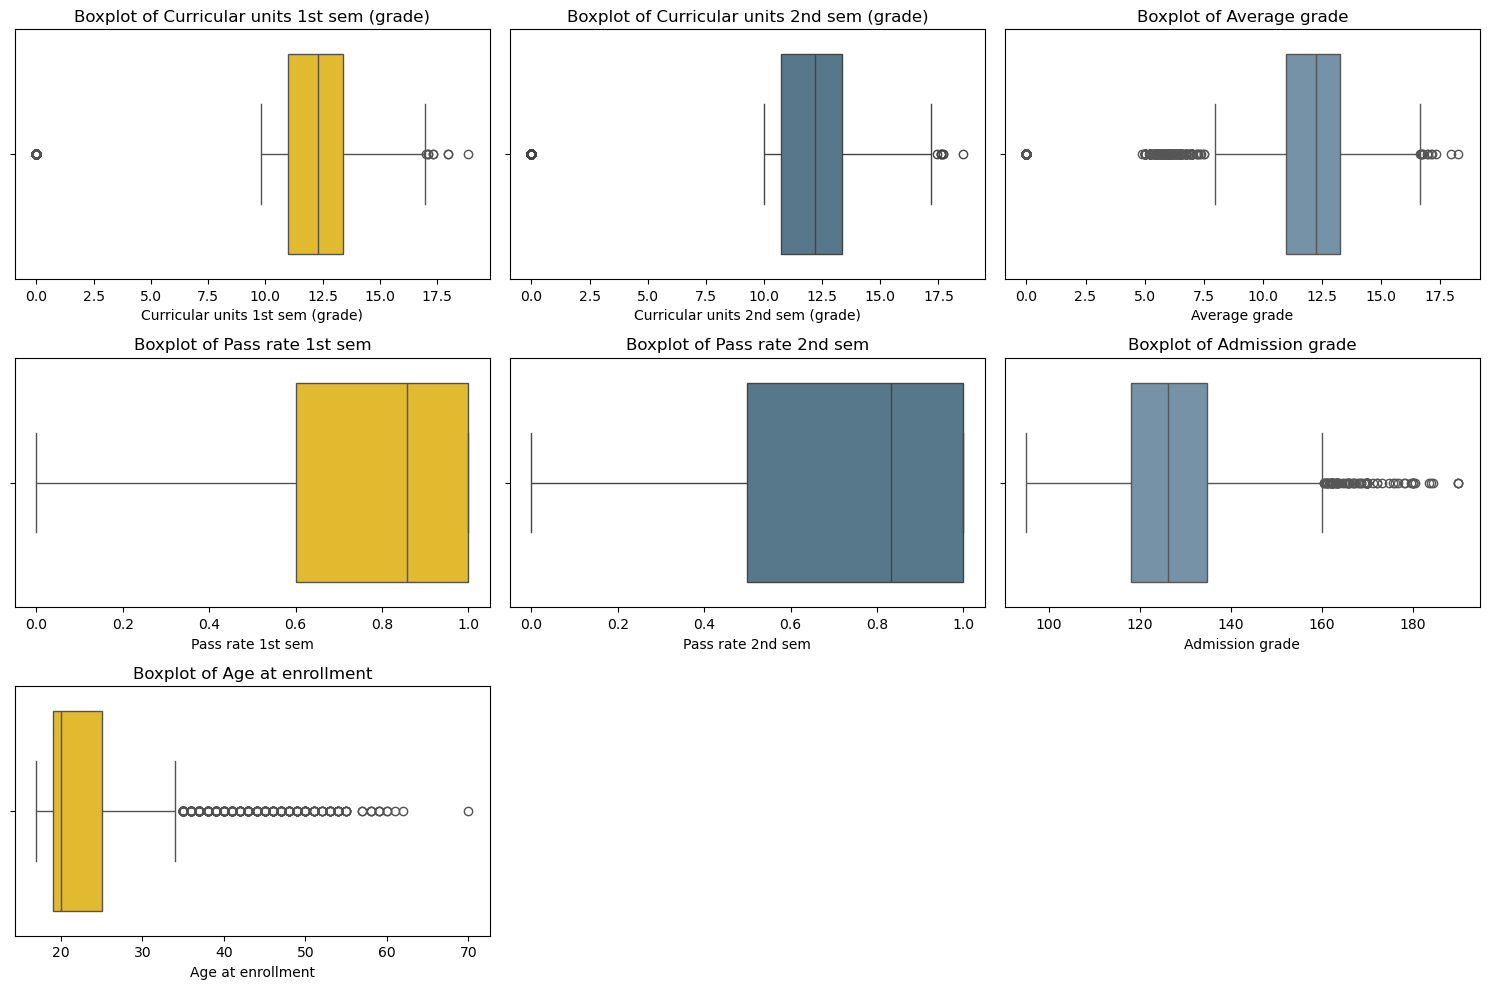

In [299]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns
numeric_columns = ['Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 
                   'Average grade', 'Pass rate 1st sem', 'Pass rate 2nd sem', 
                   'Admission grade', 'Age at enrollment']

# Create boxplots with specified colors
plt.figure(figsize=(15, 10))
colors = ['#6e93af', '#ffcb11', '#4f7992']  # Define custom colors
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col], color=colors[i % len(colors)])  # Cycle through custom colors
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


Shape before removing outliers: (4424, 41)
Shape after removing outliers: (4338, 41)


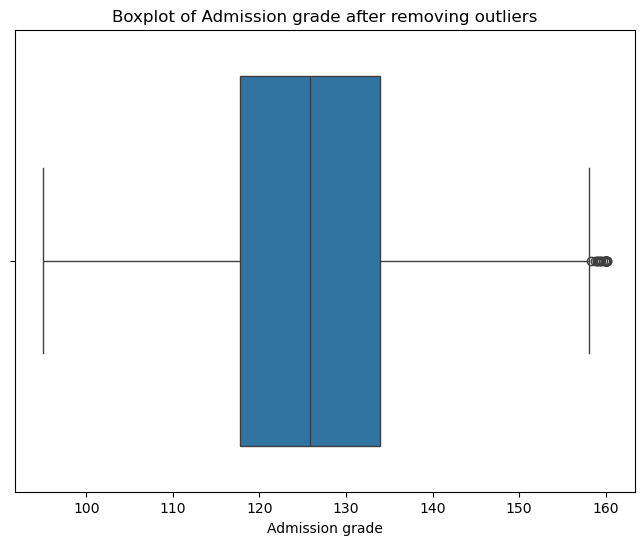

In [301]:
import numpy as np

# Select the feature from which you want to remove outliers
feature = 'Admission grade'

# Calculate the IQR (Interquartile Range)
Q1 = data[feature].quantile(0.25)  # 25th percentile
Q3 = data[feature].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
data_cleaned = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

# Print the shape of the data before and after removing outliers
print(f"Shape before removing outliers: {data.shape}")
print(f"Shape after removing outliers: {data_cleaned.shape}")

# Confirm the changes with a boxplot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x=data_cleaned[feature])
plt.title(f'Boxplot of {feature} after removing outliers')
plt.show()


In [303]:
# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler only to the training data to prevent data leakage
X_train_scaled = scaler.fit_transform(X_train_selected)

# Apply the same transformation to the test data (using the same scaling as the training data)
X_test_scaled = scaler.transform(X_test_selected)

# Display the first few rows of the scaled training data
display("Scaled training data (first few rows):\n", X_train_scaled[:5])


'Scaled training data (first few rows):\n'

array([[-1.48459634, -1.53151991, -1.96234356, -2.19189678,  0.36397802,
        -0.58311467, -0.54012179, -0.49531139,  0.21735387, -0.20013488,
        -1.09959702,  1.58833753, -0.67347927, -0.35797753, -0.74355502],
       [-0.81406014, -0.55258271,  0.21214483,  0.21457761,  0.36397802,
         1.71492856, -0.08293666, -0.08954588, -1.16351918, -0.20013488,
        -1.09959702,  0.24183091,  1.16157067, -0.35797753, -0.74355502],
       [ 0.52701228,  0.42635449,  0.65183918,  0.73025069,  0.36397802,
        -0.58311467, -0.08293666, -0.08954588, -0.25214297, -1.03107392,
         0.90942407, -0.16212107, -1.01755114, -0.35797753,  1.34489039],
       [-1.48459634, -1.53151991, -1.96234356, -2.19189678,  0.36397802,
        -0.58311467, -0.08293666, -0.08954588, -1.61230293,  0.03403885,
        -1.09959702,  2.53089216,  1.16157067, -0.35797753,  1.34489039],
       [ 0.52701228,  0.42635449,  0.7046025 ,  0.67524556,  0.36397802,
         1.71492856,  0.37424846,  0.31621963, 

In [305]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k)

# Train the KNN model with the standardized training data
knn.fit(X_train_scaled, y_train)

# Print confirmation that the model has been retrained with standardized data
print("KNN model trained with standardized features!")


KNN model trained with standardized features!


In [307]:
# Train the KNN model with the standardized data
knn.fit(X_train_scaled, y_train)

# Print confirmation that the model has been retrained with standardized data
print("KNN model trained with standardized features!")


KNN model trained with standardized features!


In [309]:
# Import the accuracy_score function

# Use the trained KNN model to make predictions on the test data
y_pred = knn.predict(X_test_scaled)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy of the model
print("Model accuracy on test data: {:.2f}%".format(accuracy * 100))


Model accuracy on test data: 81.02%


In [311]:
# Try different values of k (number of neighbors)
k_values = [3, 5, 7, 9, 11]
accuracy_scores = []

# Loop through different values of k
for k in k_values:
    # Create a KNN model with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the KNN model with the scaled training data
    knn.fit(X_train_scaled, y_train)
    
    # Make predictions on the test data
    y_pred = knn.predict(X_test_scaled)
    
    # Calculate the accuracy for this k value
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store the accuracy in the list
    accuracy_scores.append(accuracy)
    
    # Print the accuracy for this k value
    print(f"Accuracy for k={k}: {accuracy * 100:.2f}%")


Accuracy for k=3: 80.11%
Accuracy for k=5: 81.02%
Accuracy for k=7: 81.13%
Accuracy for k=9: 81.36%
Accuracy for k=11: 82.03%


In [313]:
# List of tested k values (replace with the actual values you tested)
k_values = [3, 5, 7, 9, 11]

# List of accuracy scores for each k value (replace with your actual accuracy results)
accuracy_scores = [0.79, 0.81, 0.80, 0.78, 0.77]  # Example values

# Find the index of the best k value based on the highest accuracy
best_k_index = accuracy_scores.index(max(accuracy_scores))
best_k = k_values[best_k_index]

# Print the best k value and its corresponding accuracy
print(f"The best value for k is {best_k} with an accuracy of {accuracy_scores[best_k_index] * 100:.2f}%")


The best value for k is 5 with an accuracy of 81.00%


In [315]:
from sklearn.metrics import accuracy_score

# Use the final KNN model (which we previously trained) to make predictions on the test data
y_pred_final = knn.predict(X_test_scaled)

# Calculate the accuracy of the final model on the test data
final_accuracy = accuracy_score(y_test, y_pred_final)

# Print the accuracy of the final model
print(f"Final model accuracy: {final_accuracy * 100:.2f}%")


Final model accuracy: 82.03%


In [317]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create the KNN model
knn = KNeighborsClassifier()

# Define the parameter grid for Grid Search
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Different values for k
    'weights': ['uniform', 'distance'],  # Test uniform vs. distance weighting
    'metric': ['euclidean', 'manhattan']  # Test different distance metrics
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test_scaled, y_test)
print(f"Test accuracy with best parameters: {test_accuracy:.2f}")

# Make predictions using the best model
y_pred = best_model.predict(X_test_scaled)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Final model accuracy: {accuracy * 100:.2f}%")


Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Test accuracy with best parameters: 0.81
Final model accuracy: 81.47%


In [319]:
# Import the KNeighborsClassifier from scikit-learn
from sklearn.neighbors import KNeighborsClassifier

# Create the final KNN model with the best k value
final_knn = KNeighborsClassifier(n_neighbors=best_k)

# Train the final model using the standardized training data
final_knn.fit(X_train_scaled, y_train)

# Print confirmation that the final model has been trained
print(f"Final KNN model trained with k={best_k}")


Final KNN model trained with k=5


In [321]:
# Import the necessary function to calculate the F1 score
from sklearn.metrics import f1_score

# Use the final model to make predictions on the test data
y_pred_final = final_knn.predict(X_test_scaled)

# Calculate the F1 score based on the true labels and predictions
f1 = f1_score(y_test, y_pred_final)

# Print the F1 score
print(f"Final model F1 score: {f1:.2f}")


Final model F1 score: 0.82


In [323]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
rf_y_pred = rf_model.predict(X_test_scaled)

# Evaluate the performance of the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)

# Print the results
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(f"Random Forest F1 Score: {rf_f1:.2f}")


Random Forest Accuracy: 84.07%
Random Forest F1 Score: 0.84


In [325]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the scaled training data
gb_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
gb_y_pred = gb_model.predict(X_test_scaled)

# Evaluate the performance of the Gradient Boosting model
gb_accuracy = accuracy_score(y_test, gb_y_pred)
gb_f1 = f1_score(y_test, gb_y_pred)

# Print the results
print(f"Gradient Boosting Accuracy: {gb_accuracy * 100:.2f}%")
print(f"Gradient Boosting F1 Score: {gb_f1:.2f}")


Gradient Boosting Accuracy: 83.50%
Gradient Boosting F1 Score: 0.84


In [327]:
# Train the Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_rf = random_forest.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print(f"Random Forest F1 Score: {f1_rf:.2f}")


Random Forest Accuracy: 84.07%
Random Forest F1 Score: 0.84


In [329]:
from sklearn.ensemble import GradientBoostingClassifier

# Train the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_gb = gradient_boosting.predict(X_test_scaled)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print(f"Gradient Boosting Accuracy: {accuracy_gb * 100:.2f}%")
print(f"Gradient Boosting F1 Score: {f1_gb:.2f}")


Gradient Boosting Accuracy: 83.50%
Gradient Boosting F1 Score: 0.84


In [331]:

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Use the best k from earlier analysis
knn.fit(X_train_scaled, y_train)

# Predictions and evaluation
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print(f"KNN Accuracy: {accuracy_knn * 100:.2f}%")
print(f"KNN F1 Score: {f1_knn:.2f}")


KNN Accuracy: 81.02%
KNN F1 Score: 0.82


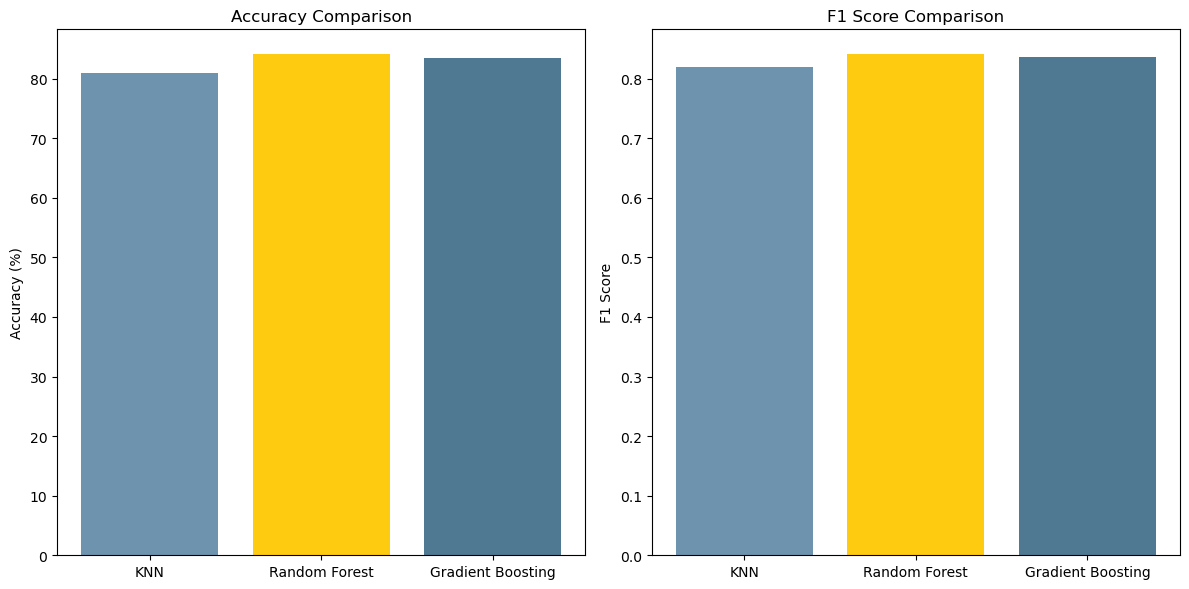

In [333]:
import matplotlib.pyplot as plt

# Data for the plot
models = ['KNN', 'Random Forest', 'Gradient Boosting']
accuracy_scores = [accuracy_knn * 100, accuracy_rf * 100, accuracy_gb * 100]
f1_scores = [f1_knn, f1_rf, f1_gb]

# Create the bar plot
plt.figure(figsize=(12, 6))

# Plot accuracies
plt.subplot(1, 2, 1)  # Corrected subplot index to 1
plt.bar(models, accuracy_scores, color=['#6e93af', '#ffcb11', '#4f7992'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy (%)')

# Plot F1 scores
plt.subplot(1, 2, 2)  # Corrected subplot index to 2
plt.bar(models, f1_scores, color=['#6e93af', '#ffcb11', '#4f7992'])
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()
